# CW1: Machine Learning Coursework Part 1

You will present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, estimate distances between data samples, build confusion matrices and calculate performance metrics.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- Don't use libraries that implement kNN, cross-validation, or any of the performance evaluation functions, unless explicitly asked to do so (or to validate the results of your code).  We want to see your code!
- Remember to comment all of your code. A substantial portion of the marks are given to useful, well-presented code documentation. For more on in-code comments, see here: 
https://medium.freecodecamp.org/code-comments-the-good-the-bad-and-the-ugly-be9cc65fbf83. 
- All functions should be clearly documented using informative docstrings. This should be a clear, textual description of the function inputs and outputs, and what the function does. For more info on docstrings, see here: https://www.programiz.com/python-programming/docstrings. 
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Save your notebook when you are done.
- The notebook code must execute fully to receive full marks. It is good practice to test this before submission by running Restart and Run all.
- Try to ensure that your notebook and code is clear and well-presented. 

**Plagiarism**: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

----


In [ ]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets # import datasets
import numpy as np # import numpy
import matplotlib.pyplot as plt # import plots

# set the seed for the random number generator
mySeed=1234567

# load data
iris = datasets.load_iris() # load data 
X = iris.data # get features
y = iris.target # get targets
#print(iris.DESCR) # print dataset description

## 1. Exploratory Data Analysis

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at-hand. The code below loads the iris dataset for you. With only 4 features (sepal length, sepal width, petal length, and petal width), and 3 classes, it is possible to use scatter plots to visualise interactions between different pairings of features. An example of how this visualisation might look is shown below:

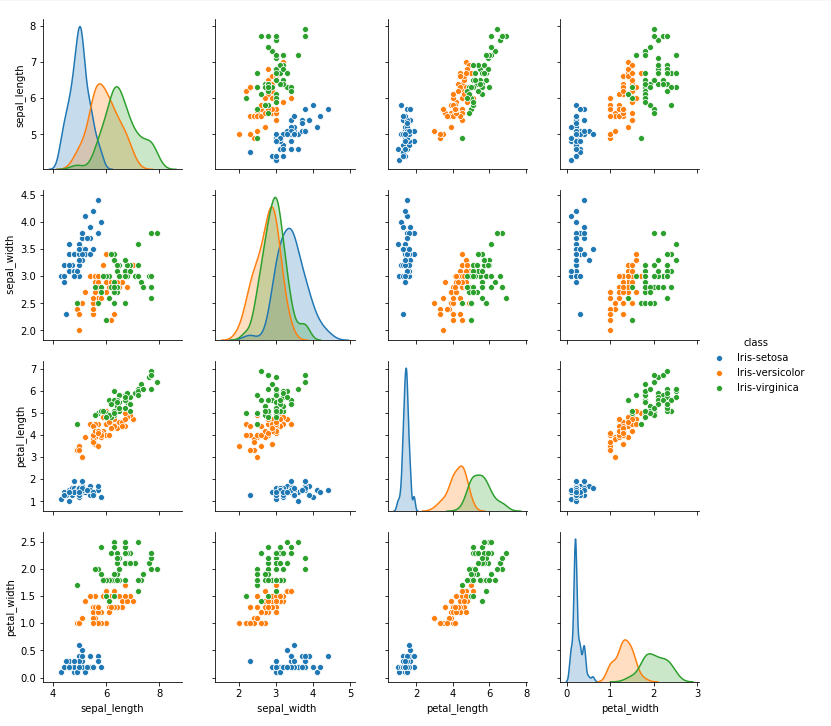

Your first task, drawing on the labs, is to recreate this 4x4 grid, with each off-diagonal subplot showing the interaction between two features, with each of the three classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a histogram on that feature.     

You should create a function that, given data X and labels y, plots this 4x4 grid.  The function should be invoked as,
        
    myplotGrid(X,y)
    
where X is your training data and y are the labels

----

In [ ]:
def myplotGrid(X,y):
    # create a figure with multiple subplots
    fig = plt.figure(figsize=(12,12))
    # Your code here...
    

In [ ]:
# run the plotting function
myplotGrid(X,y) # visualise data

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings (e.g., from webcams or other errors) they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)
    
-----


## 2. Implementing kNN

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide -- and as a way of verifying your results -- but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement a separate function for calculating the distances between two vectors, znd another function that uncovers the nearest neighbour(s) to a given vector. 

----

## 3. Nested Cross-validation using your implementation of KNN

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. Within this you should write code that evaluates classifier performance. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold, best_parameters_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan', 'minkowski'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan', 'minkowski']`` evaluates the two distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results. The outputs could be a list of accuracy values, one per fold, and a list of the corresponding parameter tuples ``(distance, k)`` used to calculate these.

**Notes:** 
- use p=3 in minkowski distance.
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should implement/validate **at least** three distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold, and a list of the corresponding parameters
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)

----

### 3.2. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .00  |  0 |   |
| 2 | .00  |  0 |   |
| 3 | .00  |  0 |   |
| 4 | .00  |  0 |   |
| 5 | .00  |  0 |   |
| **total** | 00 $\pm$ 0.3 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .00  |  0 |   |
| 2 | .00  |  0 |   |
| 3 | .00  |  0 |   |
| 4 | .00  |  0 |   |
| 5 | .00  |  0 |   |
| **total** | 00 $\pm$ 0.3 |   |    |




### 3.3. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your code above to also return a list of confusion matrices (one for each fold),
 e.g.
 
    accuracies_fold, best_parameters_fold, confusion_matrix_fold = myNestedCrossValConf(X,y,5,list(range(1,11)),['euclidean','manhattan', 'minkowski'],mySeed)

Then write a function to print the two matrices below. Make sure you label the matrix so that it is readable. You might also show class-relative precision and recall. 

----

## 4. Questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in new Markdown cells below each question.

### Q1. Choice of parameters
Do the best parameters change per fold? Is there one parameter choice that is best regardless of the data used?

Answer: 

### Q2.	 Clean vs. noisy
Does the best parameter choice change depending on whether we use clean or noisy data? (Answer for both distance function and number of neighbours.)

Answer:

### Q3. Exploratory data analysis
Looking again at the exploratory data analysis, what do you observe by plotting the figure for data without noise? What do you observe when you add Gaussian noise and plot again? 

Answer:

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:

### Q5.	Improving performance on noisy data. 
The performance of k-NN on the noisy data should be worse than on the clean data. Suggest at least one way of improving the performance on the noisy data. Try to elaborate on your idea as much as possible, including pseudocode where possible.

Answer: